## Analysis of a coarse-grained trajectory

#### In this notebook we will learn how to analyze a coarse-grained trajectory of an amphiphilic molecule that self-assembles to form a fiber. 

We want to understand how these molecules interact with each other to form these fibers and how the structure changes over time.

We will calculate: 
- the density distribution and radial distribution functions of the different residues forming the hydrophobic/hydrophilic portion of the fiber
- the order parameter, defined as the angle between the peptides and the long axis of the fiber
- the eccentricity of the fiber

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA
import math
import nglview as nv
import MDAnalysis as mda
from MDAnalysis.lib import distances 
from MDAnalysis.analysis.lineardensity import LinearDensity

import seaborn as sns

from MDAnalysis.analysis import rdf
#import MDAnalysisData as data

Load the MD trajectory (dcd) and topology file (psf)

In [31]:
CG_fiber = data.datasets.fetch_CG_fiber()

u = mda.Universe(CG_fiber['topology'], CG_fiber['trajectory'])

In [12]:
#u = mda.Universe('126chains.psf', '126chains.dcd')

The system we're studying has several components: the amphiphilic molecules (126 polymer chains), water and ions. Because we want to know how each component behaves during self-assembly, we want to separate our system into polymer and water

In [13]:
poly = u.atoms.select_atoms('not name W CL NA')

In [14]:
len(poly)

1638

In [15]:
w = u.atoms.select_atoms('name W')

In [16]:
POLY = nv.show_mdanalysis(poly)
POLY

/Users/aysenuriscen/miniconda2/lib/python2.7/site-packages/MDAnalysis/coordinates/PDB.py:906: UserWarning: Found no information for attr: 'altLocs' Using default value of ' '
  "".format(attrname, default))
/Users/aysenuriscen/miniconda2/lib/python2.7/site-packages/MDAnalysis/coordinates/PDB.py:906: UserWarning: Found no information for attr: 'icodes' Using default value of ' '
  "".format(attrname, default))
/Users/aysenuriscen/miniconda2/lib/python2.7/site-packages/MDAnalysis/coordinates/PDB.py:906: UserWarning: Found no information for attr: 'occupancies' Using default value of '1.0'
  "".format(attrname, default))
/Users/aysenuriscen/miniconda2/lib/python2.7/site-packages/MDAnalysis/coordinates/PDB.py:906: UserWarning: Found no information for attr: 'tempfactors' Using default value of '0.0'
  "".format(attrname, default))


NGLWidget(count=2221)

Each polymer chain has 4 different regions. The hydrophobic region is made up of the AAA residue, while BBB, CCC and DDD residues are hydrophilic.

In [17]:
AAA=poly.atoms.select_atoms('resname AAA')
BBB=poly.atoms.select_atoms('resname BBB')
CCC=poly.atoms.select_atoms('resname CCC')
DDD=poly.atoms.select_atoms('resname DDD')

## Density profile calculation

One way to understand how the polymer self-assembles is to look at the density distributions of different residues. The linear density function tells us where each residue is located with respect to the center of the box. We only look along the xy plane since the long axis of the fiber lies along the z direction and we want to know if the polymers are ordered along the radial direction as they assemble.

In [32]:
#Define a function that will let us change the time interval and residue names quickly
def fiber_density(res,first,last):
    dens = LinearDensity(res, binsize=0.5)
    dens.run(start=first, stop=last)
    dens_xy = 0.5*(dens.results['x']['pos']+ dens.results['y']['pos'])
    return dens_xy

Let's consider the first 5 frames of the trajectory, where the polymers are distributed randomly

In [28]:
Adens=fiber_density(AAA,0,5)
Bdens=fiber_density(BBB,0,5)
Cdens=fiber_density(CCC,0,5)
Ddens=fiber_density(DDD,0,5)

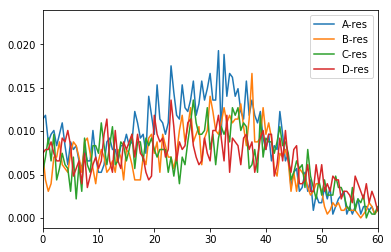

In [34]:
x = np.arange(0,AAA.dimensions[1], 0.5)
fig, ax = plt.subplots()
ax.plot(x, Adens, label='A-res')
ax.plot(x, Bdens, label='B-res')
ax.plot(x, Cdens, label='C-res')
ax.plot(x, Ddens, label='D-res')
plt.legend()
plt.xlim([0,60])
plt.show()

To see how the density profile changes over time, we can repeat the same calculation for different time intervals.

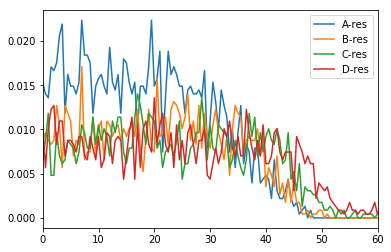

In [35]:
Adens=fiber_density(AAA,5,10)
Bdens=fiber_density(BBB,5,10)
Cdens=fiber_density(CCC,5,10)
Ddens=fiber_density(DDD,5,10)
x = np.arange(0,AAA.dimensions[1], 0.5)
fig, ax = plt.subplots()
ax.plot(x, Adens, label='A-res')
ax.plot(x, Bdens, label='B-res')
ax.plot(x, Cdens, label='C-res')
ax.plot(x, Ddens, label='D-res')
plt.legend()
plt.xlim([0,60])
plt.show()


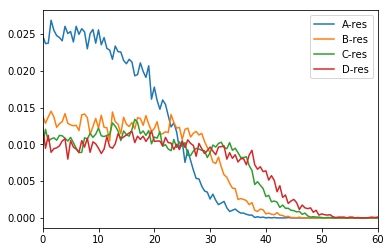

In [36]:
Adens=fiber_density(AAA,10,50)
Bdens=fiber_density(BBB,10,50)
Cdens=fiber_density(CCC,10,50)
Ddens=fiber_density(DDD,10,50)
x = np.arange(0,AAA.dimensions[1], 0.5)
fig, ax = plt.subplots()
ax.plot(x, Adens, label='A-res')
ax.plot(x, Bdens, label='B-res')
ax.plot(x, Cdens, label='C-res')
ax.plot(x, Ddens, label='D-res')
plt.legend()
plt.xlim([0,60])
plt.show()


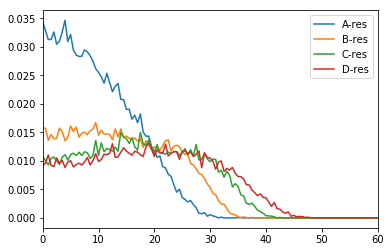

In [37]:
Adens=fiber_density(AAA,50,100)
Bdens=fiber_density(BBB,50,100)
Cdens=fiber_density(CCC,50,100)
Ddens=fiber_density(DDD,50,100)
x = np.arange(0,AAA.dimensions[1], 0.5)
fig, ax = plt.subplots()
ax.plot(x, Adens, label='A-res')
ax.plot(x, Bdens, label='B-res')
ax.plot(x, Cdens, label='C-res')
ax.plot(x, Ddens, label='D-res')
plt.legend()
plt.xlim([0,60])
plt.show()


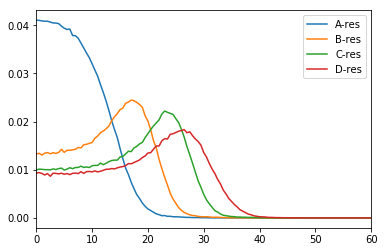

In [39]:
Adens=fiber_density(AAA,100,1000)
Bdens=fiber_density(BBB,100,1000)
Cdens=fiber_density(CCC,100,1000)
Ddens=fiber_density(DDD,100,1000)
x = np.arange(0,AAA.dimensions[1], 0.5)
fig, ax = plt.subplots()
ax.plot(x, Adens, label='A-res')
ax.plot(x, Bdens, label='B-res')
ax.plot(x, Cdens, label='C-res')
ax.plot(x, Ddens, label='D-res')
plt.legend()
plt.xlim([0,60])
plt.show()


We can also see how the distribution of water with respect to the center changes over time

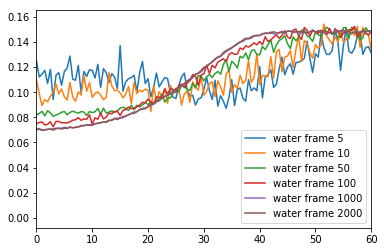

In [43]:
Wdens1=fiber_density(w,0,5)
Wdens2=fiber_density(w,5,10)
Wdens3=fiber_density(w,10,50)
Wdens4=fiber_density(w,50,100)
Wdens5=fiber_density(w,100,1000)
Wdens6=fiber_density(w,1000,2000)

fig, ax = plt.subplots()
ax.plot(x, Wdens1, label='water frame 5')
ax.plot(x, Wdens2, label='water frame 10')
ax.plot(x, Wdens3, label='water frame 50')
ax.plot(x, Wdens4, label='water frame 100')
ax.plot(x, Wdens5, label='water frame 1000')
ax.plot(x, Wdens6, label='water frame 2000')
plt.legend()
plt.xlim([0,60])
plt.show()


## Radial distribution function (RDF) calculations
While the density profile tells us where we can find each component of our system in our simulation box, radial distribution function describes the probability of finding an atom/molecule within a certain distance of another. 

First, we want to see how each polymer chain is distributed with respect to other polymer chains. For this, we choose the first bead (named T4) in the chain, which is found in the core of the fiber when self-assembled.

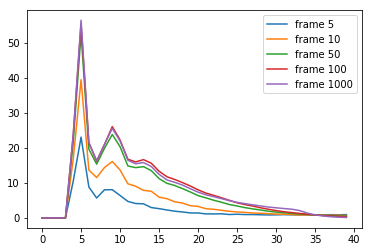

In [46]:
T4=AAA.atoms.select_atoms("name T4")
A_rdf1=rdf.InterRDF(T4, T4, range=(0,40), nbins=40, exclusion_block=(1,1))
A_rdf2=rdf.InterRDF(T4, T4, range=(0,40), nbins=40, exclusion_block=(1,1))
A_rdf3=rdf.InterRDF(T4, T4, range=(0,40), nbins=40, exclusion_block=(1,1))
A_rdf4=rdf.InterRDF(T4, T4, range=(0,40), nbins=40, exclusion_block=(1,1))
A_rdf5=rdf.InterRDF(T4, T4, range=(0,40), nbins=40, exclusion_block=(1,1))

A_rdf1.run(start=0, stop=5)
A_rdf2.run(start=5, stop=10)
A_rdf3.run(start=10, stop=50)
A_rdf4.run(start=50, stop=100)
A_rdf5.run(start=100, stop=1000)

fig, ax = plt.subplots()
ax.plot(A_rdf1.rdf, label='frame 5')
ax.plot(A_rdf2.rdf, label='frame 10')
ax.plot(A_rdf3.rdf, label='frame 50')
ax.plot(A_rdf4.rdf, label='frame 100')
ax.plot(A_rdf5.rdf, label='frame 1000')
plt.legend()
plt.show()

We can also calculate distribution of water from the core of the fiber.

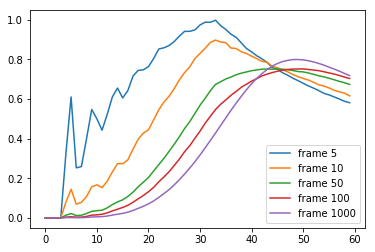

In [49]:
Aw_rdf1=rdf.InterRDF(T4, w, range=(0,60), nbins=60, exclusion_block=(1,1), start=0, stop=5)
Aw_rdf2=rdf.InterRDF(T4, w, range=(0,60), nbins=60, exclusion_block=(1,1), start=5, stop=10)
Aw_rdf3=rdf.InterRDF(T4, w, range=(0,60), nbins=60, exclusion_block=(1,1), start=10, stop=50)
Aw_rdf4=rdf.InterRDF(T4, w, range=(0,60), nbins=60, exclusion_block=(1,1), start=50, stop=100)
Aw_rdf5=rdf.InterRDF(T4, w, range=(0,60), nbins=60, exclusion_block=(1,1), start=100, stop=1000)

Aw_rdf1.run()
Aw_rdf2.run()
Aw_rdf3.run()
Aw_rdf4.run()
Aw_rdf5.run()
fig, ax = plt.subplots()
ax.plot(Aw_rdf1.rdf, label='frame 5')
ax.plot(Aw_rdf2.rdf, label='frame 10')
ax.plot(Aw_rdf3.rdf, label='frame 50')
ax.plot(Aw_rdf4.rdf, label='frame 100')
ax.plot(Aw_rdf5.rdf, label='frame 1000')
plt.legend()
plt.show()

## Order parameter calculation
We want to know more about how these polymer chains are arranged when they pack to form a fiber. One parameter we can calculate is the angle each polymer chain makes with the long axis of the fiber.

In [51]:
def order_parameter(u,start,stop):
    vec = np.array([0, 0, 1])  # Use the z-axis as reference since fiber is formed along z
    poly= u.atoms.select_atoms('not name W CL NA') 
    angle = []
    for ts in u.trajectory[start:stop]:
        for f in poly.atoms.fragments:   # loop over each polymer chain based on segment names in psf file
            pa = f.principal_axes()[-1]  # calculate the principal axis to fit a vector to each polymer chain
            costheta = np.dot(pa, vec)   # calculate the angle by taking the dot product
            angle.append(np.rad2deg(np.arccos(costheta)))
    return angle 

In [52]:
op1=order_parameter(u,0,50)

In [53]:
op2=order_parameter(u,50,100)

In [54]:
op3=order_parameter(u,100,150)

In [55]:
op4=order_parameter(u,150,200)

In [56]:
op5=order_parameter(u,200,1000)

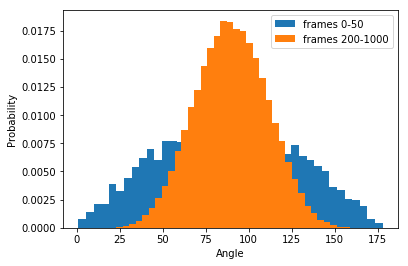

In [59]:
plt.hist(op1, density=True, bins=40, label='frames 0-50')
plt.hist(op5, density=True, bins=40, label='frames 200-1000')
plt.ylabel('Probability')
plt.xlabel('Angle')
plt.legend()
plt.show()

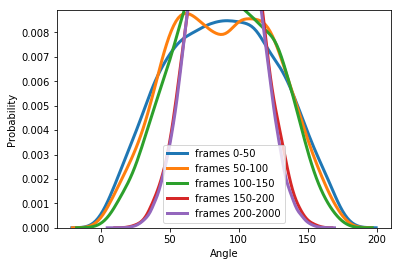

In [61]:
sns.kdeplot(op1, lw=3, label='frames 0-50')
sns.kdeplot(op2, lw=3, label='frames 50-100')
sns.kdeplot(op3, lw=3, label='frames 100-150')
sns.kdeplot(op4, lw=3, label='frames 150-200')
sns.kdeplot(op5, lw=3, label='frames 200-2000')
plt.ylabel('Probability')
plt.xlabel('Angle')
plt.show()

## Eccentricity calculation
We can see from the simulation that we formed a cylindrical fiber. Eccentricity is a way of quantifying how circular the cross-section of fiber is. 

$e = {\sqrt {1-{\frac {b^{2}}{a^{2}}}}}$ where a and b are the lengths of major and minor axes.

We can also write this in terms of moment of inertia:

$e = {\sqrt {1-{\frac {I_b}{I_a}}}}$ where $I_a$ and $I_b$ denote the major and minor axis contribution of the moment of inertia normal to the nanofiber, respectively.

- At eccentricity = 0 we get a circle
- for 0 < eccentricity < 1 we get an ellipse
- for eccentricity = 1 we get a parabola
- for eccentricity > 1 we get a hyperbola
- for infinite eccentricity we get a line



In [72]:
ecc = []
for ts in u.trajectory:
# Calculate eccentricity using moment of inertia
    mom_i = poly.moment_of_inertia()
    w, v = LA.eig(mom_i)
    idx = w.argsort()[::-1]   #we sort the moment of inertia in order from largest to smallest
    w = w[idx]
    #w[0] and w[1] are along x and y, w[2] is along long axis of fiber (z-axis)
    eccentricity = np.sqrt(1-w[1]/w[0])
    ecc.append(eccentricity)

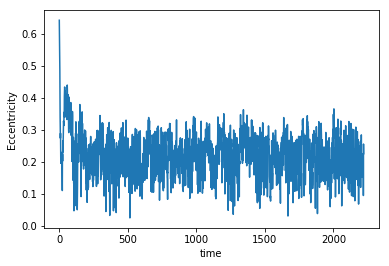

In [74]:
fig, ax = plt.subplots()
ax.plot(ecc)
plt.ylabel('Eccentricity')
plt.xlabel('time')
plt.show()